In [79]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(context="poster")

import pandas as pd

from astropy.modeling import models, fitting

In [119]:
t_fs = np.array([3.74e6,
                 3.67e6,
                 3.50e6,
                 3.04e6,
                 2.13e6,
                 1.15e6,
                 1.86e7,
                 5.49e6,
                 1.59e6,
                 4.47e5,
                 1.26e5,
                 3.98e4,
                 1.24e4])

n_0s = np.array([1.33e-1,
                 1.33e-1,
                 1.33e-1,
                 1.33e-1,
                 1.33e-1,
                 1.33e-1,
                 1.33e-3,
                 1.33e-2,
                 1.33e-1,
                 1.33e+0,
                 1.33e+1,
                 1.33e+2,
                 1.33e+3])

log_Zs = np.array([-3.0,
                   -2.0,
                   -1.5,
                   -1.0,
                   -0.5,
                   +0.5,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0])
Z_solar = 0.2
Zs = Z_solar * 10**log_Zs

runs = np.array([t_fs, n_0s, Zs])
runs = runs.T
df = pd.DataFrame(runs, columns=["t_f", "n_0", "Z"])

log_t_f_model = models.Polynomial2D(1)
fitter = fitting.LinearLSQFitter()

log_t_f_fit = fitter(log_t_f_model, np.log10(df.n_0 / 1), np.log10(df.Z / Z_solar), np.log10(df.t_f))
print(log_t_f_fit)
print("fiducial t_f: {0:e}".format(10**log_t_f_fit.c0_0))

Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
         c0_0           c1_0            c0_1     
    ------------- --------------- ---------------
    5.74241400768 -0.535252445031 -0.160922643213
fiducial t_f: 5.526040e+05


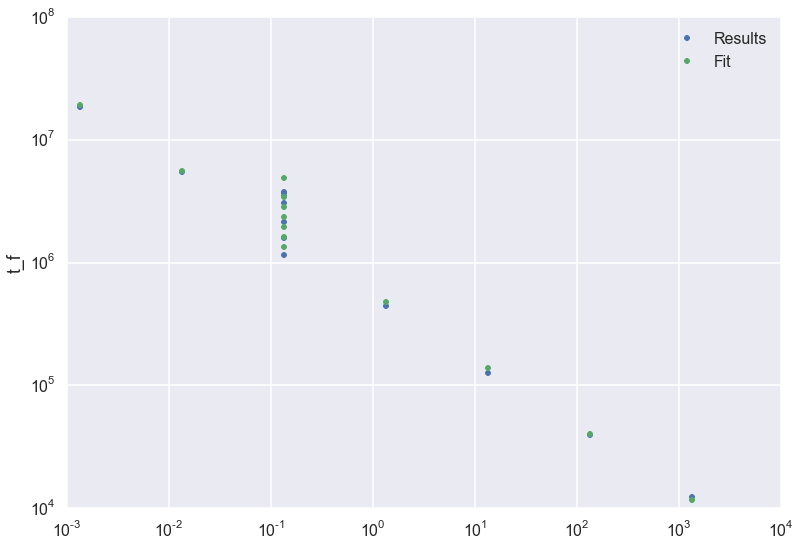

In [116]:
plt.loglog(df.n_0, df.t_f, marker=".", linestyle="", label="Results")
plt.loglog(df.n_0, 10**log_t_f_fit(np.log10(df.n_0/1), np.log10(df.Z/Z_solar)), marker=".", linestyle="", label="Fit")


plt.ylabel("t_f")
plt.legend(loc="best")

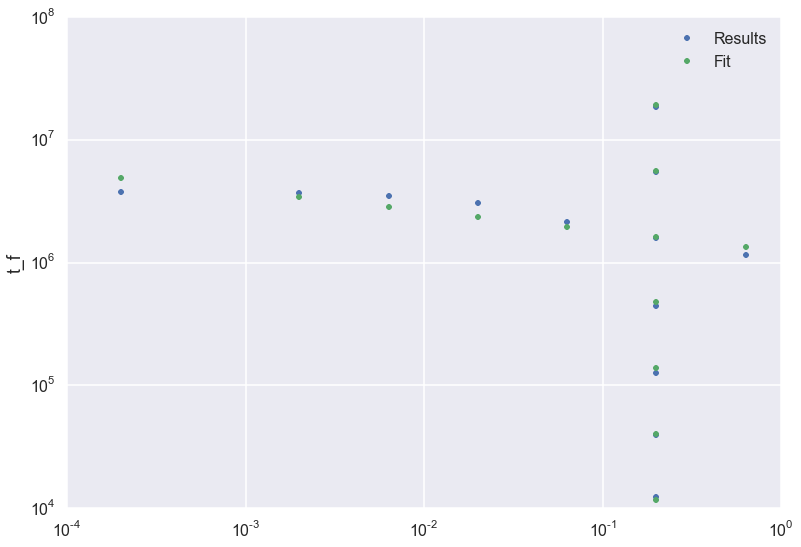

In [117]:
plt.loglog(df.Z, df.t_f, marker=".", linestyle="", label="Results")
plt.loglog(df.Z, 10**log_t_f_fit(np.log10(df.n_0/1), np.log10(df.Z/Z_solar)), marker=".", linestyle="", label="Fit")

plt.ylabel("t_f")
plt.legend(loc="best")